# **Analysis of the S&P 500**

---
Sruthi Rajarajan and Shareysan Ravishankar


## **Motivation**

The stock market, a place where anyone in the world can take place in the transfer of ownership of companies, yields great returns to those who have learned how it functions. Over time, people have tried to predict the stock market to make the right trades in order to capture the most gains that they can. It has been a race to make predictions and get as much information as they can about the industries and companies involved in the market. We set out to conduct an analysis on how well we can predict the performance of the S&P 500 over a period of the last four years using the commodities market, as well as the top 5 companies in terms of market cap. We used the Yahoo Finance API in order to pull live stock data. 

## Getting Started

### Importing Libraries and installing APIs
You will need Python 3.5 and the following libraries:

*   pandas
*   numpy
*   matplotlib/seaborn

You will also need the Yahoo! Finance API

* yfinance

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
import seaborn as sb

In [ ]:
from bs4 import BeautifulSoup
import requests
#12

## Loading Data

The data was acquired by making requests to the Yahoo! Finance API. It was directly downloaded into a dataframe called 'data2017comm'. Regarding the data, we chose to use the following tickers:
* Gold (GLD)
* Energy Select Sector SPDR Fund (XLE)
* S & P 500 (SPY)

Initially, we had chosen to use the SPX option to represent the S & P 500 since it is based on an index fund and should trend closely with the index. However, when we went to run our linear regression model, there was a lot of missing data. Therefore, we decided to use the SPY option to track the index. The SPY option is based on ETF (Exchange Traded Fund). More on ETFs here: https://www.investopedia.com/financial-advisor-4427709

## Data Cleaning

The data originally gave us the high, low, opening, closing, and adjusted closing price of the stock as well as the volume traded for that day. The high and low points of the day, as well as the adjusted close are not of significant in this project, so they will be ignored.

Below are the following columns that we are using in our finalized dataset:
* Open price
* Close price
* Trade volume
* Return (per day)

We chose to capture the opening and closing price of the stock and used that to create a column that would compute the return of the stock on a given day. The return is calculated to be (Closing Price - Opening Price)/(Opening Price). This will give us the percentage of increase or decrease in the price of the stock throughout that specific day.

In [ ]:
# Setting the start and end date
start_date = '2017-12-01'
end_date = '2021-12-01'

# Define the ticker list
# Getting data for 2 commodities (Gold and Energy)
# as of Dec 1, 2021
tickers_list_comm = ['GLD', 'XLE', 'SPY']
# Create placeholder for data
data2017comm = createdf(tickers_list_comm)
data2017comm.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GLD_Open,GLD_Close,GLD_Volume,GLD_Return,XLE_Open,XLE_Close,XLE_Volume,XLE_Return,SPY_Open,SPY_Close,SPY_Volume,SPY_Return
Date,,,,,,,,,,,,
2017-12-01,120.940002,121.589996,13080100,0.537452,69.589996,69.680000,21188300,0.129335,264.760010,264.459991,164390900,-0.113317
2017-12-04,121.150002,121.180000,6943700,0.024762,70.269997,69.650002,13575900,-0.882304,266.309998,264.140015,94040600,-0.814833
2017-12-05,120.099998,120.320000,10041200,0.183182,69.650002,69.349998,10689800,-0.430729,263.190002,263.190002,77994500,0.000000
2017-12-06,120.040001,120.070000,6643000,0.024991,69.150002,68.449997,12061200,-1.012299,263.299988,263.239990,75898600,-0.022787
2017-12-07,119.010002,118.489998,12900200,-0.436942,68.379997,68.650002,8640000,0.394859,264.070007,264.070007,77218600,0.000000


In [ ]:
# Function that will create a dataframe containing the stock data based off
# of the ticker list given
def createdf(tlist):
  df = pd.DataFrame()
  for ticker in tlist:
    dnld = yf.download(ticker, start_date, end_date)
    for col in dnld.columns:
      if (col != "High" and col != "Low" and col != "Adj Close"):
        df[ticker + '_' + col] = dnld[col]

    df[ticker + '_Return'] = 100 * (dnld['Close'] - dnld['Open']) / dnld['Open']
  return df

In [ ]:
# Getting the first 4 digits of Date to get the year
data2017comm['year'] = [str(x)[:4] for x in data2017comm.index]
data2017comm

,GLD_Open,GLD_Close,GLD_Volume,GLD_Return,XLE_Open,XLE_Close,XLE_Volume,XLE_Return,SPY_Open,SPY_Close,SPY_Volume,SPY_Return,year
Date,,,,,,,,,,,,,
2017-12-01,120.940002,121.589996,13080100,0.537452,69.589996,69.680000,21188300,0.129335,264.760010,264.459991,164390900,-0.113317,2017
2017-12-04,121.150002,121.180000,6943700,0.024762,70.269997,69.650002,13575900,-0.882304,266.309998,264.140015,94040600,-0.814833,2017
2017-12-05,120.099998,120.320000,10041200,0.183182,69.650002,69.349998,10689800,-0.430729,263.190002,263.190002,77994500,0.000000,2017
2017-12-06,120.040001,120.070000,6643000,0.024991,69.150002,68.449997,12061200,-1.012299,263.299988,263.239990,75898600,-0.022787,2017
2017-12-07,119.010002,118.489998,12900200,-0.436942,68.379997,68.650002,8640000,0.394859,264.070007,264.070007,77218600,0.000000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,167.279999,167.279999,8047800,0.000000,56.369999,57.349998,33862300,1.738513,467.220001,468.190002,73206500,0.207611,2021
2021-11-24,166.580002,167.119995,5359500,0.324165,57.049999,57.910000,21434300,1.507451,466.059998,469.440002,61858800,0.725230,2021
2021-11-26,168.600006,166.850006,9605200,-1.037960,55.040001,55.580002,44727200,0.981106,462.339996,458.970001,112669600,-0.728900,2021


In [ ]:
# Giving a numerical version of Date
data2017comm['Date'] = (data2017comm.index - data2017comm.index[0]).days
data2017comm['Date']

Date
2017-12-01       0
2017-12-04       3
2017-12-05       4
2017-12-06       5
2017-12-07       6
              ... 
2021-11-23    1453
2021-11-24    1454
2021-11-26    1456
2021-11-29    1459
2021-11-30    1460
Name: Date, Length: 1006, dtype: int64

## **Viewing the Data**

The graph of Price over Time shows that there is greater variation in SPY price when compared with gold (GLD) and the energy sector (XLE). The price of XLE on average over the four years has been steady  even with the small dip that happened during COVID. We can see that the price of Gold shows a significant increase in price and is holding steady for the past two years since COVID. For the SPY, we can see large fluctuations in price since it is the stock market overall and it has always been steadily increasing since COVID.


In [ ]:
#30

In [ ]:
# Function to plot certain tickers given the ticker list, labels,
# title, dataframe, and whether or not it should be a scatter plot or not
def plot_tickers(tk_list, xlabel, ylabel, title, df, scatter):
  fig, ax = plt.subplots()
  for i in tk_list:
    if (scatter == True):
      ax.scatter(df.index, df[i], label=i)
    else:
      ax.plot(df.index, df[i], label=i)
  fig.set_figwidth(15)
  fig.set_figheight(10)
  ax.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
  
  # Vertical line that will represent when COVID was causing panics
  ax.axvline(datetime.date(2020, 2, 24), label='COVID')

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  
  plt.title(title)
  ax.legend()

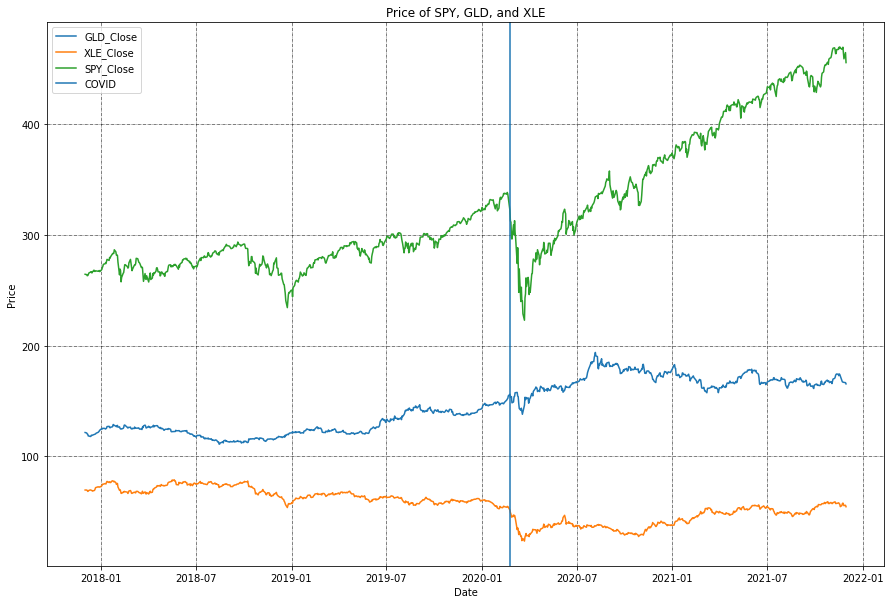

In [ ]:
plot_tickers(['GLD_Close', 'XLE_Close', 'SPY_Close'], 'Date', 'Price', 'Price of SPY, GLD, and XLE', data2017comm, False)

## The variability in return over time

On the one hand this plot shows that Gold is typically steady and that there isn't much variability in return from Gold. On the other hand, XLE (the energy sector) and SPY (the S & P 500) have greater variabilities in return from one day to the next but they were all still close to within 2% variability for most of the time. The vertical blue that shows COVID gives us insight into how this typical trend changed drastically. The spread of returns varied quite a bit and up until July of 2020. The highs and low of stocks were seen in the energy sector of up to an 8 % increase or decrease in return for a given day. Gold saw a spread of up to 3% increase and a 4% drop in return for a given day. The SPY saw a spread of up to 5% increase and up to 6% drop in the returns.Since July of 2021 up until December of 2021, the variability in returns has greatly reduced and the average daily return are within a 2% increase or decrease.

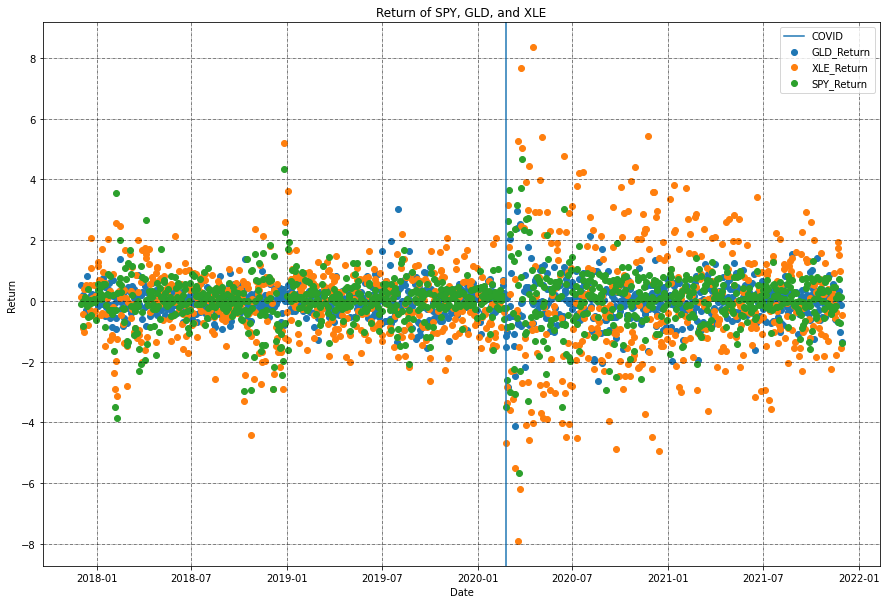

In [ ]:
plot_tickers(['GLD_Return', 'XLE_Return', 'SPY_Return'], 'Date', 'Return', 'Return of SPY, GLD, and XLE', data2017comm, True)

The violin plot shows very clearly that though there was a great spread of returns, most of the data was still concentrated around a tight plus or minus 1% return in 2018. We can see that the spread of returns in 2020 varied greatly and the size of the violin plot was also very narrow indicating that the data close price also varied between different days. More recently we can see that 2019 and 2021 have a similar profile where the spread of returns is slightly biased to be greater than 0 but the close price is quite close to 0 with most of the stocks not yielding wildly different returns per day. The plot is symmetrical and centered around 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SPY Return Over Each Year')

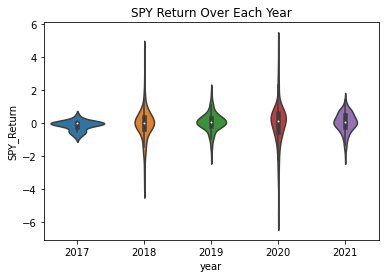

In [ ]:
vplt = sb.violinplot(data2017comm['year'], data2017comm['SPY_Return'])
vplt.set_title("SPY Return Over Each Year")

Volume of trades are also important trends to look at and they show shifts in the market very clearly. During March of 2018 and March of 2020 we see very high volumes of trading in stocks mostly the S & P 500 (SPY_Volume). The Gold market held quite steady in volumes of trade pre COVID but the colume increased from 0.1 (ten million) to ~ 0.3 (ten million). The Energy market (XLE) also saw increases in volume of trading but not as high as the SPY.

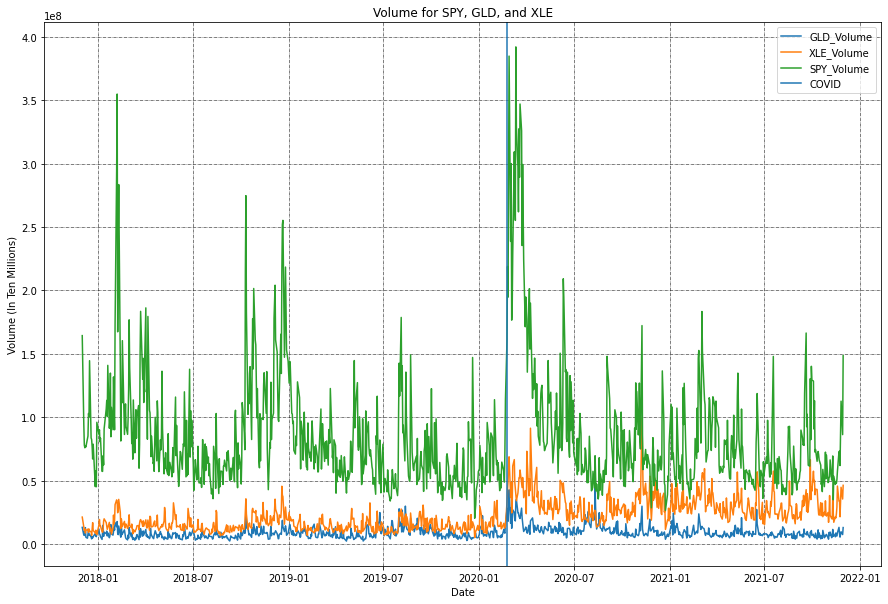

In [ ]:
plot_tickers(['GLD_Volume', 'XLE_Volume', 'SPY_Volume'], 'Date', 'Volume (In Ten Millions)', 'Volume for SPY, GLD, and XLE', data2017comm, False)

Again, we can see in the violin graph that in 2018, while most of the volume was under 10 million trades, there was still a small spike in volume. For 2020, we see a wide range in volume of over 40 million trades and the violin is narrow suggesting that the data is spread more between the different numbers of trades.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SPY Volume for Each Year')

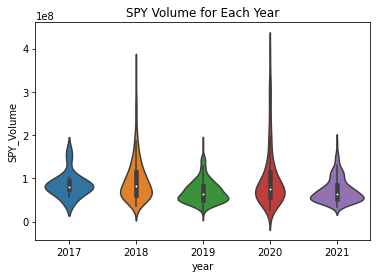

In [ ]:
vplt = sb.violinplot(data2017comm['year'], data2017comm['SPY_Volume'])
vplt.set_title("SPY Volume for Each Year")

In [ ]:
# Function to plot the multivariable linear regression with the price of SPY as
# the value to predict

def plot_SPYPrice(formula, xlabel, ylabel, title, df):
  fig, ax = plt.subplots()
  fitted = ols(formula=formula, data=df).fit()
  print(fitted.summary())

  print("P-Values:")
  print(fitted.pvalues)
  predicted_spy = fitted.predict()
  ax.plot(df['Date'], predicted_spy)
  ax.plot(df['Date'], df['SPY_Close'])
  residuals = df['SPY_Close'] - predicted_spy
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  
  ax.set_title(title)
  return residuals

In [ ]:
#66

In [ ]:
# Function to plot the multivariable linear regression with the return of SPY as
# the value to predict

def plot_SPYReturn(formula, xlabel, ylabel, title, df):
  fig, ax = plt.subplots()
  fitted = ols(formula=formula, data=df).fit()
  print(fitted.summary())

  print("P-Values:")
  print(fitted.pvalues)
  predicted_spy = fitted.predict()
  ax.plot(df['Date'], predicted_spy)
  ax.plot(df['Date'], df['SPY_Return'])
  residuals = df['SPY_Return'] - predicted_spy
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  
  ax.set_title(title)
  return residuals

#Predicting the price of the S&P 500
One of the main goals that we had was to create a model to predict the price of the S and P 500. When we did this exercise, we got a model with a correlation coefficient of 77% when we tried to predict the price using date. In the graph, we can see that the linear regression was generally successful however, the pandemic did have an impact on the market and thus reducing the efficacy of general prediction models, especially linear regression.

We soon realized that date has is a significant predictor of the price. Infact, date is a dependent variable in this case and through our analysis we could see by the p-value that it is the most significant factor. As a result, we know that we need two independent factors in order to create a linear regression model. Therefore we chose to use the return in our next iteration in order to build our model.

                            OLS Regression Results                            
Dep. Variable:              SPY_Close   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     3515.
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:53:38   Log-Likelihood:                -4800.4
No. Observations:                1006   AIC:                             9605.
Df Residuals:                    1004   BIC:                             9615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    231.1503      1.808    127.879      0.0

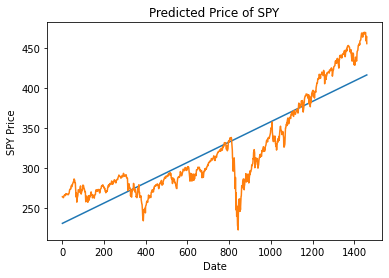

In [ ]:
res = plot_SPYPrice("SPY_Close ~ Date", 'Date', 'SPY Price', 'Predicted Price of SPY', data2017comm)

# Can we predict the return of the S & P 500?


We initially chose the linear model and once we did our computation, realized that using linear regression would not yield an accurate result since the price of the stock is dependent on time. As a result, we chose to next take a look at the returns for each day since the percentage change in returns on a given day shouldn't be directly correlated with time. 

We tried to create a model using linear regression in order to predict the returns of SPY. The correlation coefficient was 0.001 and the p-value for date was 0.42 showing us that date is not a significant factor in predicting the returns from the S&P 500. 


                            OLS Regression Results                            
Dep. Variable:             SPY_Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6296
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.428
Time:                        04:53:38   Log-Likelihood:                -1300.1
No. Observations:                1006   AIC:                             2604.
Df Residuals:                    1004   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0315      0.056     -0.566      0.5

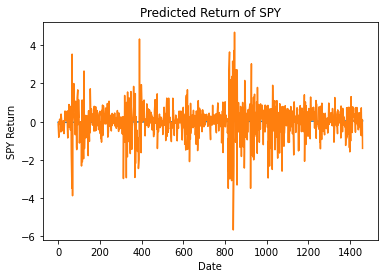

In [ ]:
res = plot_SPYReturn("SPY_Return ~ Date", 'Date', 'SPY Return', 'Predicted Return of SPY', data2017comm)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SPY_Return ~ Date')

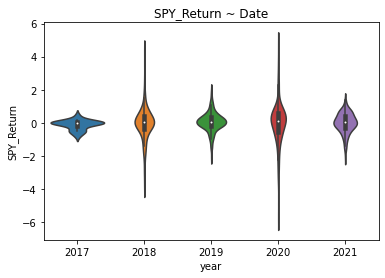

In [ ]:
vplt = sb.violinplot(data2017comm['year'], res)
vplt.set_title("SPY_Return ~ Date")

In [ ]:
res

Date
2017-12-01   -0.081792
2017-12-04   -0.783465
2017-12-05    0.031316
2017-12-06    0.008477
2017-12-07    0.031211
                ...   
2021-11-23    0.163070
2021-11-24    0.680636
2021-11-26   -0.773598
2021-11-29    0.069351
2021-11-30   -1.438848
Name: SPY_Return, Length: 1006, dtype: float64

# Predicting the returns of the S & P 500 using multivariate regression model
We looked at how well we could predict the price of the SPY ( S & P 500) for a given day using a multivariate linear regression model. We included the GLD return and XLE return to see which one of these variables had the most impact on the price of the SPY. We identified that the variable that correlated with the data the most was the XLE return. This showed us that the SPY return is closely correlated with XLE return. Overall, the model had a correlation coefficient of 38.5%. This tells us that this model is not an accurate predictor of the return of the S & P 500.

                            OLS Regression Results                            
Dep. Variable:             SPY_Return   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     89.15
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          8.58e-101
Time:                        04:53:39   Log-Likelihood:                -1056.1
No. Observations:                1006   AIC:                             2128.
Df Residuals:                     998   BIC:                             2167.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

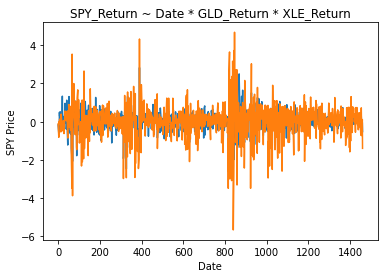

In [ ]:
res = plot_SPYReturn("SPY_Return ~ Date * GLD_Return * XLE_Return", 'Date', 'SPY Price', 'SPY_Return ~ Date * GLD_Return * XLE_Return', data2017comm)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SPY_Return ~ Date * GLD_Return * XLE_Return')

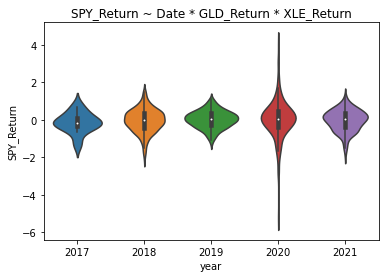

In [ ]:
vplt = sb.violinplot(data2017comm['year'], res)
vplt.set_title("SPY_Return ~ Date * GLD_Return * XLE_Return")

 **Is the commodities market correlated with the stock market? **

I asked myself the question if the commodities market was going to be a good predictor of the stock market to begin with. I plottted the return of the GLD with the return of the SPY and found that the correlation coefficient was 0.018. This shows that there is nearly no correlation between them.

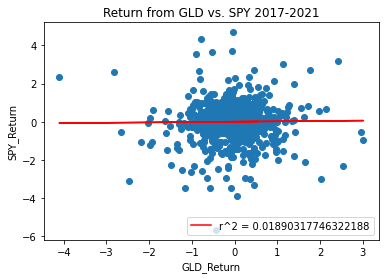

In [ ]:
X = data2017comm.iloc[:, 3]
y = data2017comm.iloc[:, 11]
# Calculating the parameters using the least square method
theta = np.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X

# Plotting the data points and the best fit line
plt.scatter(X, y)
plt.plot(X, y_line, 'r',label = 'r^2 = {}'.format(theta[0]))
plt.title('Return from GLD vs. SPY 2017-2021')
plt.xlabel('GLD_Return')
plt.ylabel('SPY_Return')
# To plot the regression line

plt.legend(loc='lower right')
plt.show()

# data2017comm.plot(x='GLD_Return', y='SPY_Return', style='o',)


Next, I knew that we only had data from 2017 - 2021. I pulled data from 2000 to 2021 to check if the correlation would change since we had COVID disrupt the market in the short recent years. However, the correlation coefficient was still quite low at 0.046. I then concluded that there is no correlation between the commodities market and the stock markeet based on the commmodities that we had chosen.

In [ ]:
start_date = '2000-12-01'
end_date = '2021-12-01'
data2000comm = createdf(tickers_list_comm)
data2000comm

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GLD_Open,GLD_Close,GLD_Volume,GLD_Return,XLE_Open,XLE_Close,XLE_Volume,XLE_Return,SPY_Open,SPY_Close,SPY_Volume,SPY_Return
Date,,,,,,,,,,,,
2004-11-18,44.430000,44.380001,5992000,-0.112535,35.790001,35.950001,2195000,0.447052,118.529999,118.739998,31854300,0.177170
2004-11-19,44.490002,44.779999,11655300,0.651825,36.150002,36.380001,3936400,0.636237,118.699997,117.419998,54276500,-1.078348
2004-11-22,44.750000,44.950001,11996000,0.446929,36.430000,36.959999,3719800,1.454842,117.169998,117.980003,37560200,0.691308
2004-11-23,44.880001,44.750000,3169200,-0.289664,37.000000,37.189999,1845900,0.513510,117.930000,118.160004,41968800,0.195034
2004-11-24,44.930000,45.049999,6105100,0.267080,37.299999,37.500000,3549200,0.536195,118.269997,118.440002,29724800,0.143744
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,167.279999,167.279999,8047800,0.000000,56.369999,57.349998,33862300,1.738513,467.220001,468.190002,73206500,0.207611
2021-11-24,166.580002,167.119995,5359500,0.324165,57.049999,57.910000,21434300,1.507451,466.059998,469.440002,61858800,0.725230
2021-11-26,168.600006,166.850006,9605200,-1.037960,55.040001,55.580002,44727200,0.981106,462.339996,458.970001,112669600,-0.728900


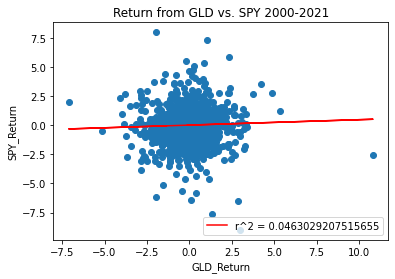

In [ ]:
X = data2000comm.iloc[:, 3]

y = data2000comm.iloc[:, 11]

# Calculating the parameters using the least square method
theta = np.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X

# Plotting the data points and the best fit line
plt.scatter(X, y)
plt.plot(X, y_line, 'r',label = 'r^2 = {}'.format(theta[0]))
plt.title('Return from GLD vs. SPY 2000-2021')
plt.xlabel('GLD_Return')
plt.ylabel('SPY_Return')
# To plot the regression line

plt.legend(loc='lower right')
plt.show()
plt.show()
# data2000comm.plot(x='GLD_Return', y='SPY_Return', style='o')

I was curious to see if the energy market correlated better with the stock market. The energy fund that we chose has some stocks in it and I thought that it would be a better predictor. As predicted, the correlation coefficient rose to 0.30 for the data from 2017-2021 and 0.44 for the data from 2000 - 2021. 

As a result, we chose to look at different sectors to better predict returns from the S & P 500. These analyses continue below. 

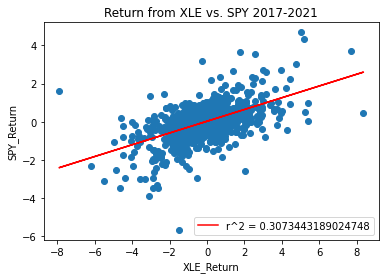

In [ ]:
X = data2017comm.iloc[:, 7]
y = data2017comm.iloc[:, 11]
# Calculating the parameters using the least square method
theta = np.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X

# Plotting the data points and the best fit line
plt.scatter(X, y)
plt.plot(X, y_line, 'r',label = 'r^2 = {}'.format(theta[0]))
plt.title('Return from XLE vs. SPY 2017-2021')
plt.xlabel('XLE_Return')
plt.ylabel('SPY_Return')
# To plot the regression line

plt.legend(loc='lower right')
plt.show()

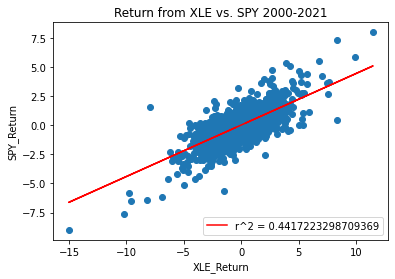

In [ ]:
X = data2000comm.iloc[:, 7]
y = data2000comm.iloc[:, 11]
# Calculating the parameters using the least square method
theta = np.polyfit(X, y, 1)
y_line = theta[1] + theta[0] * X

# Plotting the data points and the best fit line
plt.scatter(X, y)
plt.plot(X, y_line, 'r',label = 'r^2 = {}'.format(theta[0]))
plt.title('Return from XLE vs. SPY 2000-2021')
plt.xlabel('XLE_Return')
plt.ylabel('SPY_Return')
# To plot the regression line

plt.legend(loc='lower right')
plt.show()

In [ ]:
#123

The S&P 500 is composed of 505 stocks, as 5 of the companies have two classes which the index includes. In order to get all 505 stocks, we will do some web scraping on a website that contains this data for us.

In [ ]:
r = requests.get("https://stockmarketmba.com/stocksinthesp500.php")
r.status_code

200

In [ ]:
bs = BeautifulSoup(r.content)
tab = bs.find("table")


In [ ]:
tab_elements = tab.find_all("td")
text_arr = list(map(lambda x: x.get_text(), tab_elements))
arr = np.array(text_arr).reshape(506, 11)
arr

array([['A', 'Agilent Technologies Inc', 'Common stocks', ..., '7.22',
        '8.51', 'Analyze'],
       ['AAL', 'American Airlines Group Inc', 'Common stocks', ...,
        '0.44', '-1.48', 'Analyze'],
       ['AAP', 'Advance Auto Parts Inc', 'Common stocks', ..., '1.36',
        '4.54', 'Analyze'],
       ...,
       ['ZION', 'Zions Bancorporation', 'Common stocks', ..., '3.44',
        '1.23', 'Analyze'],
       ['ZTS', 'Zoetis Inc ', 'Common stocks', ..., '14.46', '23.69',
        'Analyze'],
       ['TOTAL', '505', '', ..., '', '', '']], dtype='<U42')

In [ ]:
df = pd.DataFrame(data = arr)
df.columns = ['Ticker', 'Company', 'Type', 'Size', 'Sector', 'Market Cap', 'Dividend Yield', 'Price to TTM earnings', 'Price to TTM sales', 'Price to Book Value', 'Action']
df

,Ticker,Company,Type,Size,Sector,Market Cap,Dividend Yield,Price to TTM earnings,Price to TTM sales,Price to Book Value,Action
0,A,Agilent Technologies Inc,Common stocks,Large cap,Health Care,"$45,650,578,334",0.51%,37.88,7.22,8.51,Analyze
1,AAL,American Airlines Group Inc,Common stocks,Large cap,Industrials,"$10,696,939,903",0.00%,-3.39,0.44,-1.48,Analyze
2,AAP,Advance Auto Parts Inc,Common stocks,Large cap,Consumer Discretionary,"$14,912,864,131",1.35%,22.46,1.36,4.54,Analyze
3,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"$2,826,165,947,220",0.50%,29.66,7.73,44.50,Analyze
4,ABBV,Abbvie Inc,Common stocks,Large cap,Health Care,"$232,878,391,607",3.88%,30.38,4.22,16.89,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
501,ZBH,Zimmer Biomet Holdings Inc,Common stocks,Large cap,Health Care,"$25,167,147,724",0.80%,30.81,3.19,1.99,Analyze
502,ZBRA,Zebra Technologies Corp,Common stocks,Large cap,Information Technology,"$31,639,500,332",0.00%,37.22,5.79,11.17,Analyze
503,ZION,Zions Bancorporation,Common stocks,Mid cap,Financials,"$9,930,735,997",2.25%,8.20,3.44,1.23,Analyze
504,ZTS,Zoetis Inc,Common stocks,Large cap,Health Care,"$110,148,422,620",0.43%,55.93,14.46,23.69,Analyze


The 5 columns to the right are not necessary, as well as the row on the bottom, so they will be dropped. The market cap column needs to be sorted as we will be looking at the highest market caps, so it needs to be converted from a string to an integer.

In [ ]:

df = df.drop(columns = ['Action', 'Dividend Yield', 'Price to TTM earnings', 'Price to TTM sales', 'Price to Book Value'])
df = df.drop(index = 505)
df['Market Cap']= [x[1:] for x in df['Market Cap']]
df['Market Cap'] = df['Market Cap'].str.replace(',','')
df['Market Cap'] = pd.to_numeric(df['Market Cap'])
df['Market Cap']

0        45650578334
1        10696939903
2        14912864131
3      2826165947220
4       232878391607
           ...      
500      39159651230
501      25167147724
502      31639500332
503       9930735997
504     110148422620
Name: Market Cap, Length: 505, dtype: int64

In [ ]:
df.sort_values(by= ['Market Cap'], inplace=True, ascending=False)

In [ ]:
df.head(6)

,Ticker,Company,Type,Size,Sector,Market Cap
3,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,2826165947220
319,MSFT,Microsoft Corp,Common stocks,Large cap,Information Technology,2439342846256
205,GOOG,Alphabet Inc Class C,Common stocks,Large cap,Communication Services,1958162795366
206,GOOGL,Alphabet Inc Class A,Common stocks,Large cap,Communication Services,1958162795366
34,AMZN,Amazon.Com Inc.,Common stocks,Large cap,Consumer Discretionary,1712850514740
180,FB,Facebook Inc Class A,Common stocks,Large cap,Communication Services,955804642867


The top 5 companies will be looked at as the analysis is done. These have been stable and strong companies with a good prospect for the long term as well. We will see if they can indicate the S&P500's direction better than the commodities market.

In [ ]:
start_date = '2017-12-01'
end_date = '2021-12-01'

In [ ]:
tickers_list_megacaps = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB', 'SPY']
# Create placeholder for data
data2017megacaps = createdf(tickers_list_megacaps)
data2017megacaps['year'] = [str(x)[:4] for x in data2017megacaps.index]
data2017megacaps['Date'] = (data2017comm.index - data2017comm.index[0]).days
# Print first 5 rows of the data
data2017megacaps.head(200)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Return,MSFT_Open,MSFT_Close,MSFT_Volume,MSFT_Return,GOOG_Open,GOOG_Close,GOOG_Volume,GOOG_Return,AMZN_Open,AMZN_Close,AMZN_Volume,AMZN_Return,FB_Open,FB_Close,FB_Volume,FB_Return,SPY_Open,SPY_Close,SPY_Volume,SPY_Return,year,Date
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-01,42.487499,42.762501,159037200,0.647253,83.599998,84.260002,29532100,0.789478,1015.799988,1010.169983,1909600,-0.554243,1172.050049,1162.349976,4107100,-0.827616,176.029999,175.100006,20182500,-0.528315,264.760010,264.459991,164390900,-0.113317,2017,0
2017-12-04,43.119999,42.450001,130169600,-1.553799,84.419998,81.080002,39094900,-3.956404,1012.659973,998.679993,1906400,-1.380521,1173.849976,1133.949951,5931900,-3.399074,176.289993,171.470001,24459400,-2.734127,266.309998,264.140015,94040600,-0.814833,2017,3
2017-12-05,42.264999,42.410000,109400800,0.343075,81.339996,81.589996,26152300,0.307352,995.940002,1005.150024,2067300,0.924757,1128.260010,1141.569946,4079800,1.179687,170.449997,172.830002,20184900,1.396307,263.190002,263.190002,77994500,0.000000,2017,4
2017-12-06,41.875000,42.252499,114240000,0.901489,81.550003,82.779999,26162100,1.508272,1001.500000,1018.380005,1272000,1.685472,1137.989990,1152.349976,2853300,1.261873,172.500000,176.059998,20255800,2.063767,263.299988,263.239990,75898600,-0.022787,2017,5
2017-12-07,42.257500,42.330002,102693200,0.171572,82.540001,82.489998,23184500,-0.060580,1020.429993,1030.930054,1458200,1.028984,1156.589966,1159.790039,2511600,0.276682,175.800003,180.139999,20404500,2.468712,264.070007,264.070007,77218600,0.000000,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-12,56.235001,55.267502,197114800,-1.720457,111.430000,111.709999,18891100,0.251278,1172.719971,1162.819946,1295500,-0.844193,1994.000000,1990.000000,4414000,-0.200602,163.250000,162.000000,24078100,-0.765697,289.059998,289.119995,59810800,0.020756,2018,285
2018-09-13,55.880001,56.602501,166825600,1.292949,112.120003,112.910004,26055600,0.704603,1170.739990,1175.329956,1431200,0.392057,2000.000000,1989.869995,3621500,-0.506500,162.000000,161.360001,25453800,-0.395061,290.320007,290.829987,51034200,0.175661,2018,286
2018-09-14,56.437500,55.959999,127997200,-0.846070,113.360001,113.370003,19122300,0.008823,1179.099976,1172.530029,944000,-0.557200,1992.930054,1970.189941,3642000,-1.141039,161.720001,162.320007,21770400,0.371015,291.059998,290.880005,55079900,-0.061840,2018,287


In [ ]:
#83 (+23)

As seen below, Google and Amazon seem to move together but somewhat differently from the S&P500, but Microsoft, Apple, and Facebook all seem to be moving together with it.

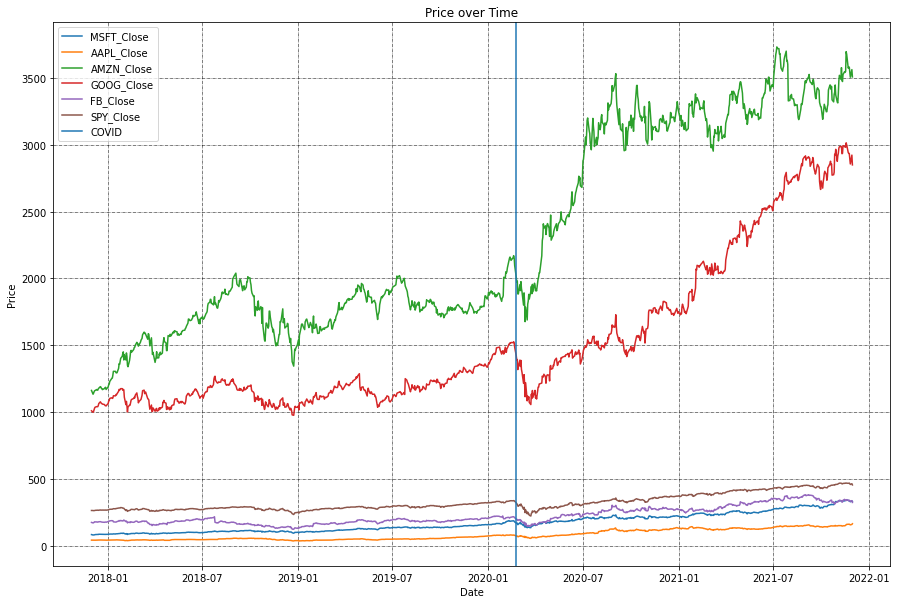

In [ ]:
plot_tickers(['MSFT_Close', 'AAPL_Close', 'AMZN_Close', 'GOOG_Close', 'FB_Close', 'SPY_Close'], 'Date', 'Price', 'Price over Time', data2017megacaps, False)

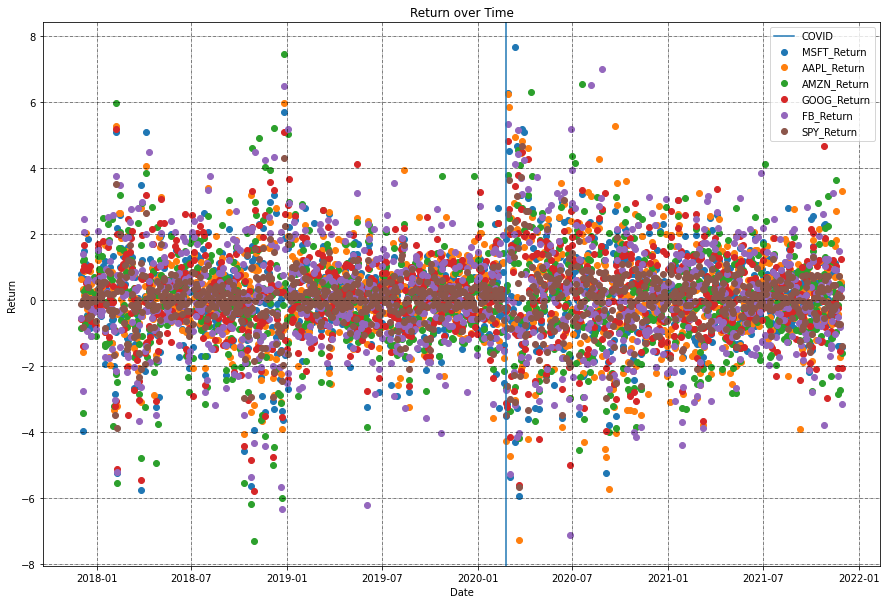

In [ ]:
plot_tickers(['MSFT_Return', 'AAPL_Return', 'AMZN_Return', 'GOOG_Return', 'FB_Return', 'SPY_Return'], 'Date', 'Return', 'Return over Time', data2017megacaps, True)

                            OLS Regression Results                            
Dep. Variable:             SPY_Return   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     207.0
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          1.87e-189
Time:                        04:53:49   Log-Likelihood:                -849.20
No. Observations:                1006   AIC:                             1714.
Df Residuals:                     998   BIC:                             1754.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

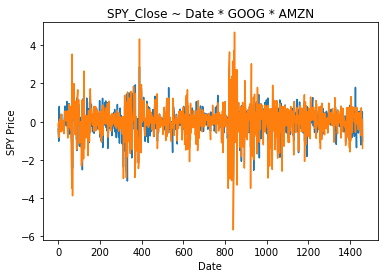

In [ ]:
res = plot_SPYReturn("SPY_Return ~ Date * GOOG_Return * AMZN_Return", 'Date', 'SPY Price', 'SPY_Close ~ Date * GOOG * AMZN', data2017megacaps)

                            OLS Regression Results                            
Dep. Variable:             SPY_Return   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     48.90
Date:                Tue, 21 Dec 2021   Prob (F-statistic):          2.14e-252
Time:                        04:53:49   Log-Likelihood:                -570.21
No. Observations:                1006   AIC:                             1268.
Df Residuals:                     942   BIC:                             1583.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

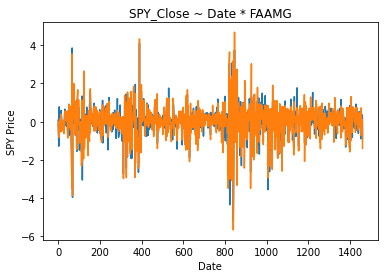

In [ ]:
res = plot_SPYReturn("SPY_Return ~ Date * GOOG_Return * AMZN_Return * AAPL_Return * FB_Return * MSFT_Return", 'Date', 'SPY Price', 'SPY_Close ~ Date * FAAMG', data2017megacaps)

**Conclusion**
Overall, we learned a lot throughout this iterative process. First off, we started off trying to predict the price of the S & P 500 using a linear regression model using commodities such as Gold (GLD) and the Energy market (XLE). Based on the initial regression models that we created, we saw that the date was a dependent variable and thus we would not get an accurate prediction of price based on our model. As a result, we then moved to check if the returns on a given day would be dependent on date. We were able to tell with our model that it was not the case, date had a p-value of 0.42 and the correlation coefficient was 0. We then proceeded to build a multivariate regression model using the returns of Gold and the Energey sector in order to predict returns of the S & P 500. We concluded that the energy sector had the ost significant impact on the predicted returns of the S & P 500.

However, we recognized that this model was not a strong predictor of the S & P 500 returns. Plotting a scatter plot of gold and the energy fund with the S & P showed that there isn't a very strong correlation and that the commodities market might not be a strong predictor. We learned that this is infact well known in the trading and investing communities. Since stocks and commodities are often not correlated, diversifying our portfolios with a blend of stocks and commodities will help us to avoid sharp dips in our portfolio. We have included some further reading to help better understand this phenomenon.

From this analysis we learned that the proper method to use for predicting time series data would be to use the autoregression model. We have included some reading materials on this model for futher reading.

We also learned that we need to pick certain variables that are better at predicting our output.

 **Further Learning**
Stocks versus Commodities: https://www.thebalance.com/how-much-commodities-investment-809211

Commodities to invest in: https://www.investopedia.com/financial-edge/0412/the-3-best-commodities-to-invest-in.aspx

Understanding returns: https://www.investopedia.com/terms/r/return.aspc

Top oil/energy mutual funds: https://www.investopedia.com/articles/investing/101615/top-5-oil-mutual-funds.asp
